In [4]:
!pip install biopython

     |████████████████████████████████| 2.3MB 5.5MB/s 


In [1]:
import os
import Bio
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import GC
from Bio.Data import CodonTable
from Bio.Seq import UnknownSeq
import regex as re

In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/2lab_bioinfo"

/content/drive/MyDrive/Colab Notebooks/2lab_bioinfo


In [3]:
!ls

2lab_bioinfo.ipynb  reads_for_analysis.fastq


In [4]:
record = SeqIO.parse("reads_for_analysis.fastq", "fastq")
record

In [5]:
with open("reads_for_analysis.fastq") as f:
    lines = f.readlines()

In [6]:
lines

['@M00827:12:000000000-AEUNW:1:1101:12983:1610 1:N:0:6\n',
 'TGCGTTTATTACATTACCTTCTATTATATTTGCTGACGAACCAACAGGTGCACTGGATTCTAAAAGTACTCAAGATTTATTAAAACGATTAACAAGAATGAATGAAGCATTTAAGTCTACAATTATTATGGTAACGCATGATCCTGTTGC\n',
 '+\n',
 '1>>1>AD1DF3@1BGGGGGGGGBGG3F3FGH3FG11B000AA00A/0/B1A1BF000DFFF22111B2FGHBB11BGHBGHB211FCCGHCBGBBC00B11FFFDBEE1BGG22@GHHBGB1FGFGH2GB1GBFG?EEEAFHHGHFGHGH\n',
 '@M00827:12:000000000-AEUNW:1:1101:16324:1777 1:N:0:6\n',
 'AGGCGTTATCGTGGCGATGACGCTGGAAGAAGCGGAAGCGGCTGTTCACGATATGCTGGCGGGCAACGCTTTTGGCGACGCGGGTCATCGCATCGTTATCGAAGAGTTCCTCGATGGCGAAGAAGCGAGCTTTATCGTGATGGTGGACGGC\n',
 '+\n',
 'ABBBBBBBBDAFFGGGGGGGGGGGGGHHFHHHHGGGGGHGGGGGHHGHHHGHGGHGHHGGGGC?EFHGGGGGHHGHCCFCDGGGGGAGHHGADCD.GGHHHEHGGGCGBHCC.;CCDFDBGGBGGGFAF?9FGEFFFFF/;FF/;DAB9B-\n',
 '@M00827:12:000000000-AEUNW:1:1101:18840:1877 1:N:0:6\n',
 'AATGCATCTTTAATCGGGAACTTTCATGAAAGCACCAGGCTTGCCCGCCGATCAACAATTTTTCGCCGATCTGTTCAGCGGCCTGGTGCTTAACCCGCAACTACTGGGGCGCGTCTGGTTTGCCAGCCAGCCTGCCTCGTTGCCGGTGGGC\n',
 '+\n',
 'ACCCCFFFF

In [7]:
quality_lines = lines[3::4]

In [8]:
quality_lines

['1>>1>AD1DF3@1BGGGGGGGGBGG3F3FGH3FG11B000AA00A/0/B1A1BF000DFFF22111B2FGHBB11BGHBGHB211FCCGHCBGBBC00B11FFFDBEE1BGG22@GHHBGB1FGFGH2GB1GBFG?EEEAFHHGHFGHGH\n',
 'ABBBBBBBBDAFFGGGGGGGGGGGGGHHFHHHHGGGGGHGGGGGHHGHHHGHGGHGHHGGGGC?EFHGGGGGHHGHCCFCDGGGGGAGHHGADCD.GGHHHEHGGGCGBHCC.;CCDFDBGGBGGGFAF?9FGEFFFFF/;FF/;DAB9B-\n',
 'ACCCCFFFFFFFGGGGGGGGGGHHHHHHHHHHHHHHHHGHHHGHHHGGGGGGGGHHHHHHHHHHGGGGGGGHHHHHHHHGGGGGGHHHHHHHHHHHGGGGGHHHHHHHGGGGGGGGGHHHHGHHHHGGGGGGHHGHHHGHGHGHGG@BFGE\n',
 'DDDDDFFFFFFFGGGGGGGGGGGGGFGGHHHFHHHGGHFFHEEGGGEFGGHHHFHHHGGGCEGGGGH1EGCFGGFCDFGG@CCCFGGBGHDCGCEFDHH0DGHHFHGFHFHFHHHHGGCGEGFFDDGGGFFGGGGGADF:<FGGAFGFFFF\n',
 'DDDDDFFFFFFFGGGGGGGGGGHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIIHGHHIIHHIHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGGFGGGHHHHHHHHHHHHHHHHHHHHHHIHIHHHHHHH\n',
 'DDDDDFFFFFFFGGGGGGGGGGHHHHHHHHHHHHHHHHHGGHHHHHHHHHHGGGFGGGHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHGGGGHFGGHGGGGHGHHHHHHGGGGGHHHHGGGGGHHHHHHHHHHGGDDGCFGGHHGGGG\n',
 'CDDDDFFFDDDFGGGGGGGGGGHHHHHGGEFGHHHHGHHGGGGGEEEHHHH

In [9]:
len(quality_lines)

25749

In [10]:
len(lines)

102996

In [11]:
len(lines)/len(quality_lines)

4.0

In [12]:
quality_lines[0]

'1>>1>AD1DF3@1BGGGGGGGGBGG3F3FGH3FG11B000AA00A/0/B1A1BF000DFFF22111B2FGHBB11BGHBGHB211FCCGHCBGBBC00B11FFFDBEE1BGG22@GHHBGB1FGFGH2GB1GBFG?EEEAFHHGHFGHGH\n'

In [13]:
quality_lines[-1]

'3>AAAF@ABBBFGGGFGCGGEGGHHGGFGGGGGGGGHHHGGGGGGGGEGHHHGHGHEGGHHHGGGGGGCDGGGGGGHGGGGCGGHHHGGGGGGGGGGGHHHGGGGHGGGCGGGBGHHGHHHHG:CGFDGCBBGGGGGGGGGGGABFGGFFF\n'

In [14]:
quality = [line[:-1] for line in quality_lines]

In [15]:
quality

['1>>1>AD1DF3@1BGGGGGGGGBGG3F3FGH3FG11B000AA00A/0/B1A1BF000DFFF22111B2FGHBB11BGHBGHB211FCCGHCBGBBC00B11FFFDBEE1BGG22@GHHBGB1FGFGH2GB1GBFG?EEEAFHHGHFGHGH',
 'ABBBBBBBBDAFFGGGGGGGGGGGGGHHFHHHHGGGGGHGGGGGHHGHHHGHGGHGHHGGGGC?EFHGGGGGHHGHCCFCDGGGGGAGHHGADCD.GGHHHEHGGGCGBHCC.;CCDFDBGGBGGGFAF?9FGEFFFFF/;FF/;DAB9B-',
 'ACCCCFFFFFFFGGGGGGGGGGHHHHHHHHHHHHHHHHGHHHGHHHGGGGGGGGHHHHHHHHHHGGGGGGGHHHHHHHHGGGGGGHHHHHHHHHHHGGGGGHHHHHHHGGGGGGGGGHHHHGHHHHGGGGGGHHGHHHGHGHGHGG@BFGE',
 'DDDDDFFFFFFFGGGGGGGGGGGGGFGGHHHFHHHGGHFFHEEGGGEFGGHHHFHHHGGGCEGGGGH1EGCFGGFCDFGG@CCCFGGBGHDCGCEFDHH0DGHHFHGFHFHFHHHHGGCGEGFFDDGGGFFGGGGGADF:<FGGAFGFFFF',
 'DDDDDFFFFFFFGGGGGGGGGGHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIIHGHHIIHHIHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGGFGGGHHHHHHHHHHHHHHHHHHHHHHIHIHHHHHHH',
 'DDDDDFFFFFFFGGGGGGGGGGHHHHHHHHHHHHHHHHHGGHHHHHHHHHHGGGFGGGHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHGGGGHFGGHGGGGHGHHHHHHGGGGGHHHHGGGGGHHHHHHHHHHGGDDGCFGGHHGGGG',
 'CDDDDFFFDDDFGGGGGGGGGGHHHHHGGEFGHHHHGHHGGGGGEEEHHHHHHHHHHHHHHHG

In [16]:
ranges = {
    'Sanger': (33, 73),
    'Illumina-1.8': (33, 74),
    'Solexa': (59, 104),
    'Illumina-1.3': (64, 104),
    'Illumina-1.5': (66, 105)
}

In [17]:
quality_string = "".join(quality)    

In [18]:
ascii_vals = [ord(chara) for chara in quality_string]

In [19]:
ord('a')

97

In [20]:
chr(33)

'!'

In [21]:
len(quality_string)

3877209

In [22]:
len(ascii_vals)

3877209

In [23]:
max(ascii_vals)

73

In [24]:
min(ascii_vals)

35

In [25]:
print('['+chr(35)+', '+chr(73)+"]")

[#, I]


In [26]:
def range_subset(range1, range2):
    """Whether range1 is a subset of range2."""
    if not range1:
        return True  # empty range is subset of anything
    if not range2:
        return False  # non-empty range can't be subset of empty range
    if len(range1) > 1 and range1.step % range2.step:
        return False  # must have a single value or integer multiple step
    return range1.start in range2 and range1[-1] in range2

In [27]:
quality_range = range(min(ascii_vals), max(ascii_vals))
quality_range

range(35, 73)

In [33]:
for key, value in ranges.items():
    print(key, range_subset(quality_range, range(value[0], value[1])))

Sanger True
Illumina-1.8 True
Solexa False
Illumina-1.3 False
Illumina-1.5 False


In [34]:
sequence_lines = lines[1::4]
sequence_lines

['TGCGTTTATTACATTACCTTCTATTATATTTGCTGACGAACCAACAGGTGCACTGGATTCTAAAAGTACTCAAGATTTATTAAAACGATTAACAAGAATGAATGAAGCATTTAAGTCTACAATTATTATGGTAACGCATGATCCTGTTGC\n',
 'AGGCGTTATCGTGGCGATGACGCTGGAAGAAGCGGAAGCGGCTGTTCACGATATGCTGGCGGGCAACGCTTTTGGCGACGCGGGTCATCGCATCGTTATCGAAGAGTTCCTCGATGGCGAAGAAGCGAGCTTTATCGTGATGGTGGACGGC\n',
 'AATGCATCTTTAATCGGGAACTTTCATGAAAGCACCAGGCTTGCCCGCCGATCAACAATTTTTCGCCGATCTGTTCAGCGGCCTGGTGCTTAACCCGCAACTACTGGGGCGCGTCTGGTTTGCCAGCCAGCCTGCCTCGTTGCCGGTGGGC\n',
 'ATACATATAGTGAAAATAGAGGCGGAAATAGTTTTTCCGTACGGCGCTAAACAGCTCGCGTACCGTAGGCGGCGTCGCGCGCGTGGCATCGTCTTCACCATAAACCAGCTCTTTACGGTAGGCAGCCTCTACACGCTGGTTTTTAAACTCC\n',
 'ATTCATGACCTAATGTCACTGGAAAATTAACTTTATAATGACCTTCATAAGTATGAATATCTGTGCCACAAATTCCTGCATAATGAACTTTAATCTTTACTTTATCATCTAGCGGTGTTGCAACTTCTTTATCAAGAAGTTCTAAGTTGCC\n',
 'TACCTTACCTTGTTCCACTGGTTTAGAAGGCTTTTTAGGTTCTTCTTTTGCGGGTGGTACTGGTTTACCTGGCTCAGATGGTATTTCTGGCGTTGGTGGCGTTGGTACTTCCGGTTCACTCGGCACTTCTGGTGTCGGTGGTGTTGGTGTT\n',
 'ATTCTGGGGCTAATCCTCATACTTGGCGGTGAGATGATCGGGCGTGTGCTC

In [37]:
sequeunce_reads = [line[:-1] for line in sequence_lines]
sequeunce_reads[0]

'TGCGTTTATTACATTACCTTCTATTATATTTGCTGACGAACCAACAGGTGCACTGGATTCTAAAAGTACTCAAGATTTATTAAAACGATTAACAAGAATGAATGAAGCATTTAAGTCTACAATTATTATGGTAACGCATGATCCTGTTGC'

In [38]:
len(sequeunce_reads)

25749

In [42]:
cg_distribution = []
for read in sequeunce_reads:
    count = 0
    for char in read: 
        if char == 'G' or char=='C': 
            count = count + 1
    cg_distribution.append(count/len(read))
print(len(cg_distribution))
print(cg_distribution)

25749
[0.32666666666666666, 0.5761589403973509, 0.5695364238410596, 0.5099337748344371, 0.32450331125827814, 0.4966887417218543, 0.48344370860927155, 0.5033112582781457, 0.38, 0.4304635761589404, 0.4768211920529801, 0.5629139072847682, 0.5033112582781457, 0.41721854304635764, 0.33112582781456956, 0.48344370860927155, 0.7483443708609272, 0.37333333333333335, 0.23178807947019867, 0.54, 0.5629139072847682, 0.5960264900662252, 0.7086092715231788, 0.5298013245033113, 0.2702702702702703, 0.45695364238410596, 0.5695364238410596, 0.2582781456953642, 0.697986577181208, 0.3708609271523179, 0.31788079470198677, 0.32450331125827814, 0.4105960264900662, 0.6423841059602649, 0.32, 0.609271523178808, 0.33774834437086093, 0.3576158940397351, 0.5761589403973509, 0.4864864864864865, 0.4966887417218543, 0.5364238410596026, 0.3841059602649007, 0.543046357615894, 0.32, 0.52, 0.31333333333333335, 0.31125827814569534, 0.6688741721854304, 0.695364238410596, 0.6533333333333333, 0.5827814569536424, 0.33112582781

In [46]:
rounded_cg_distribution = [round(x, 2) for x in cg_distribution]
rounded_cg_distribution

[0.33,
 0.58,
 0.57,
 0.51,
 0.32,
 0.5,
 0.48,
 0.5,
 0.38,
 0.43,
 0.48,
 0.56,
 0.5,
 0.42,
 0.33,
 0.48,
 0.75,
 0.37,
 0.23,
 0.54,
 0.56,
 0.6,
 0.71,
 0.53,
 0.27,
 0.46,
 0.57,
 0.26,
 0.7,
 0.37,
 0.32,
 0.32,
 0.41,
 0.64,
 0.32,
 0.61,
 0.34,
 0.36,
 0.58,
 0.49,
 0.5,
 0.54,
 0.38,
 0.54,
 0.32,
 0.52,
 0.31,
 0.31,
 0.67,
 0.7,
 0.65,
 0.58,
 0.33,
 0.34,
 0.5,
 0.41,
 0.67,
 0.32,
 0.41,
 0.44,
 0.44,
 0.26,
 0.3,
 0.6,
 0.72,
 0.54,
 0.36,
 0.57,
 0.66,
 0.74,
 0.53,
 0.75,
 0.53,
 0.69,
 0.42,
 0.47,
 0.55,
 0.49,
 0.34,
 0.45,
 0.48,
 0.31,
 0.52,
 0.31,
 0.3,
 0.27,
 0.5,
 0.31,
 0.39,
 0.49,
 0.49,
 0.5,
 0.64,
 0.36,
 0.33,
 0.51,
 0.78,
 0.7,
 0.37,
 0.33,
 0.59,
 0.28,
 0.46,
 0.56,
 0.36,
 0.5,
 0.46,
 0.53,
 0.52,
 0.54,
 0.49,
 0.72,
 0.36,
 0.48,
 0.39,
 0.46,
 0.46,
 0.42,
 0.57,
 0.35,
 0.35,
 0.75,
 0.48,
 0.38,
 0.38,
 0.42,
 0.28,
 0.35,
 0.29,
 0.49,
 0.41,
 0.55,
 0.47,
 0.28,
 0.65,
 0.46,
 0.49,
 0.45,
 0.46,
 0.3,
 0.52,
 0.4,
 0.33,
 0.49,
 0.6,
 0.

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

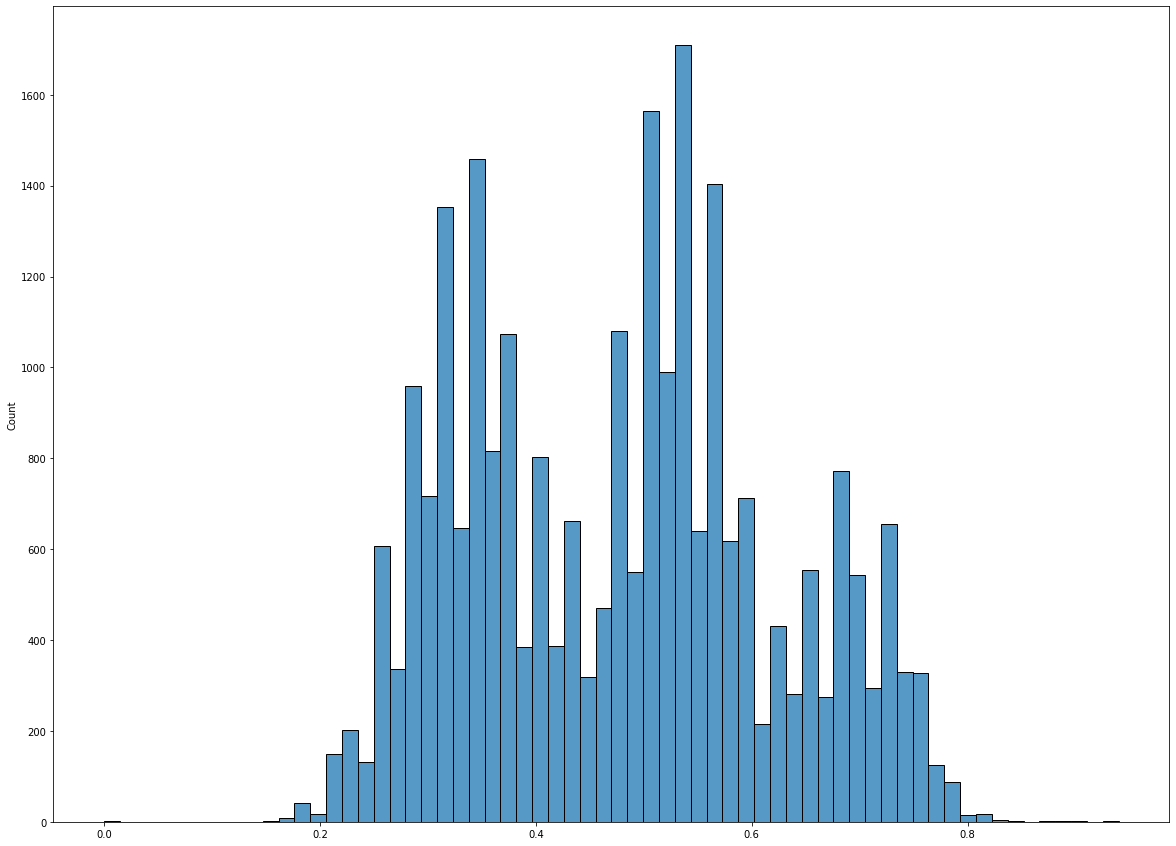

In [69]:
plt.figure(figsize=(20,15))
sns.histplot(rounded_cg_distribution)

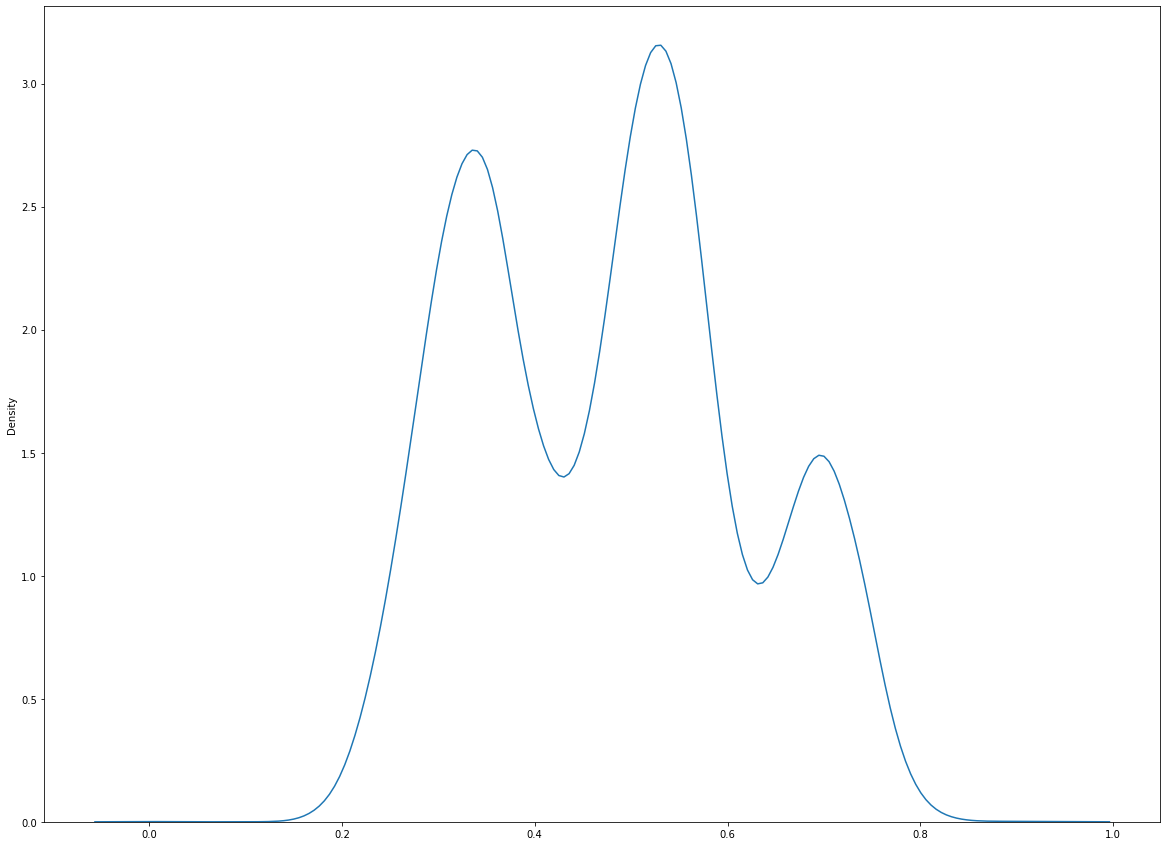

In [70]:
plt.figure(figsize=(20,15))
sns.kdeplot(rounded_cg_distribution)

In [71]:
from collections import Counter
Counter(rounded_cg_distribution)

Counter({0.0: 1,
         0.15: 1,
         0.16: 1,
         0.17: 8,
         0.18: 8,
         0.19: 34,
         0.2: 18,
         0.21: 91,
         0.22: 59,
         0.23: 203,
         0.24: 131,
         0.25: 274,
         0.26: 333,
         0.27: 337,
         0.28: 517,
         0.29: 443,
         0.3: 718,
         0.31: 587,
         0.32: 767,
         0.33: 646,
         0.34: 833,
         0.35: 625,
         0.36: 815,
         0.37: 519,
         0.38: 554,
         0.39: 384,
         0.4: 482,
         0.41: 321,
         0.42: 386,
         0.43: 275,
         0.44: 386,
         0.45: 318,
         0.46: 471,
         0.47: 418,
         0.48: 663,
         0.49: 549,
         0.5: 916,
         0.51: 649,
         0.52: 990,
         0.53: 718,
         0.54: 991,
         0.55: 641,
         0.56: 887,
         0.57: 516,
         0.58: 619,
         0.59: 327,
         0.6: 385,
         0.61: 215,
         0.62: 267,
         0.63: 163,
         0.64: 281,


In [98]:
rounded_cg_distribution

[0.33,
 0.58,
 0.57,
 0.51,
 0.32,
 0.5,
 0.48,
 0.5,
 0.38,
 0.43,
 0.48,
 0.56,
 0.5,
 0.42,
 0.33,
 0.48,
 0.75,
 0.37,
 0.23,
 0.54,
 0.56,
 0.6,
 0.71,
 0.53,
 0.27,
 0.46,
 0.57,
 0.26,
 0.7,
 0.37,
 0.32,
 0.32,
 0.41,
 0.64,
 0.32,
 0.61,
 0.34,
 0.36,
 0.58,
 0.49,
 0.5,
 0.54,
 0.38,
 0.54,
 0.32,
 0.52,
 0.31,
 0.31,
 0.67,
 0.7,
 0.65,
 0.58,
 0.33,
 0.34,
 0.5,
 0.41,
 0.67,
 0.32,
 0.41,
 0.44,
 0.44,
 0.26,
 0.3,
 0.6,
 0.72,
 0.54,
 0.36,
 0.57,
 0.66,
 0.74,
 0.53,
 0.75,
 0.53,
 0.69,
 0.42,
 0.47,
 0.55,
 0.49,
 0.34,
 0.45,
 0.48,
 0.31,
 0.52,
 0.31,
 0.3,
 0.27,
 0.5,
 0.31,
 0.39,
 0.49,
 0.49,
 0.5,
 0.64,
 0.36,
 0.33,
 0.51,
 0.78,
 0.7,
 0.37,
 0.33,
 0.59,
 0.28,
 0.46,
 0.56,
 0.36,
 0.5,
 0.46,
 0.53,
 0.52,
 0.54,
 0.49,
 0.72,
 0.36,
 0.48,
 0.39,
 0.46,
 0.46,
 0.42,
 0.57,
 0.35,
 0.35,
 0.75,
 0.48,
 0.38,
 0.38,
 0.42,
 0.28,
 0.35,
 0.29,
 0.49,
 0.41,
 0.55,
 0.47,
 0.28,
 0.65,
 0.46,
 0.49,
 0.45,
 0.46,
 0.3,
 0.52,
 0.4,
 0.33,
 0.49,
 0.6,
 0.

In [74]:
first_peak_indices = [i for i, j in enumerate(rounded_cg_distribution) if j == 0.34]
second_peak_indices = [i for i, j in enumerate(rounded_cg_distribution) if j == 0.56]
third_peak_indices = [i for i, j in enumerate(rounded_cg_distribution) if j == 0.7]

In [75]:
len(first_peak_indices)

833

In [115]:
first_peak_indices

[36,
 53,
 78,
 194,
 300,
 329,
 480,
 481,
 482,
 488,
 491,
 535,
 578,
 609,
 702,
 720,
 728,
 731,
 774,
 798,
 809,
 852,
 860,
 873,
 914,
 934,
 1042,
 1066,
 1097,
 1104,
 1115,
 1121,
 1179,
 1181,
 1217,
 1255,
 1284,
 1285,
 1296,
 1376,
 1438,
 1509,
 1583,
 1613,
 1623,
 1630,
 1673,
 1674,
 1678,
 1687,
 1740,
 1774,
 1802,
 1859,
 1872,
 1889,
 1893,
 1940,
 1946,
 1999,
 2013,
 2128,
 2140,
 2153,
 2172,
 2176,
 2190,
 2222,
 2241,
 2312,
 2322,
 2339,
 2348,
 2360,
 2364,
 2365,
 2382,
 2386,
 2399,
 2474,
 2480,
 2522,
 2529,
 2531,
 2697,
 2704,
 2716,
 2799,
 2869,
 2888,
 2972,
 3038,
 3167,
 3226,
 3233,
 3242,
 3248,
 3253,
 3283,
 3285,
 3287,
 3294,
 3405,
 3430,
 3432,
 3438,
 3464,
 3478,
 3577,
 3612,
 3688,
 3695,
 3699,
 3726,
 3753,
 3763,
 3796,
 3888,
 3900,
 3908,
 3971,
 4059,
 4069,
 4172,
 4192,
 4234,
 4319,
 4403,
 4425,
 4439,
 4485,
 4510,
 4512,
 4515,
 4541,
 4562,
 4569,
 4579,
 4592,
 4607,
 4626,
 4643,
 4646,
 4753,
 4775,
 4782,
 4836,


In [80]:
import random

print("Random integer from 0 to 9")
num1 = random.randint(0, 9)
print("Random integer: ", num1)

Random integer from 0 to 9
Random integer:  7


In [116]:
seq_indices_1_peak = [random.randint(0, len(first_peak_indices)) for i in range(5)]
seq_indices_2_peak = [random.randint(0, len(second_peak_indices)) for i in range(5)]
seq_indices_3_peak = [random.randint(0, len(third_peak_indices)) for i in range(5)]
print(seq_indices_1_peak)
print(seq_indices_2_peak)
print(seq_indices_3_peak)

[715, 631, 150, 561, 111]
[33, 207, 415, 599, 394]
[484, 323, 193, 454, 486]


In [118]:
first_peak_indices[seq_indices_1_peak[0]]

22457

In [121]:
for i in seq_indices_1_peak:
    print(sequeunce_reads[first_peak_indices[i]])
count = 0
for char in sequeunce_reads[first_peak_indices[0]]: 
    if char == 'G' or char=='C': 
        count = count + 1
print(count/len(sequeunce_reads[first_peak_indices[0]]))

ATTTAACATTAAATATATTACTCACATTGCCACTCATATTGCTCTTTGAGTTCAGTATGTTCATTGTTAAGTTCACATGCCGAGGCAAACCGCCAACACATTAACCTTATAAGAATTAATGCTGTGATTATCGTTATACTGCAATACCGA
CATGCAGGTTTGAGCAATAAAGAAAGAGAAGAAGCGCAGAATGATTTCTTATTTGATCGTGTTAAAGTAGTCGTTGCTACAAATGCTTTTGGTATGGGTATTGATAAATCCAATGTACGCTTTGTTATTCATTATAATATGCCTGGAGATT
ATAATGTGTTGCCCAATGATCTATAATCCACTTCGGCATACTATACTCGATTGCCATTCTTTTTTTAGGATCTGCAATTTCATTAAAATCAGGTAAGTCACTACGCATCATTGTACGTAAAATACCATTTACGACATTACCATTATGAT
TGGATTATCATCAACATTACGTCAACGTATTTGTGATGCTGCAATTCAATTGATGGAAAATATTAAATATGTCAATGCAGGTACTGTTGAATTTCTAGTATCTGGTGACGAATTCTTCTTTATAGAAGTTAACCCTCGTGTACAAGTAG
AATAACTTATCTGATTGTTCATGTTTAAATAAAGAAAACCACTCACATCAGTGTGTGTTCGAACTAGACTTGTAAGTTCCAGTTCGGTACGACTTTCTAAAGCAATTATTATTGCTGTGATTGTCGTATATCACTTAGATGTGCGTGGTTT
0.33774834437086093


In [123]:
seq_1_peak = [sequeunce_reads[first_peak_indices[i]] for i in seq_indices_1_peak]
seq_2_peak = [sequeunce_reads[second_peak_indices[i]] for i in seq_indices_2_peak]
seq_3_peak = [sequeunce_reads[third_peak_indices[i]] for i in seq_indices_3_peak]
seq_1_peak

['ATTTAACATTAAATATATTACTCACATTGCCACTCATATTGCTCTTTGAGTTCAGTATGTTCATTGTTAAGTTCACATGCCGAGGCAAACCGCCAACACATTAACCTTATAAGAATTAATGCTGTGATTATCGTTATACTGCAATACCGA',
 'CATGCAGGTTTGAGCAATAAAGAAAGAGAAGAAGCGCAGAATGATTTCTTATTTGATCGTGTTAAAGTAGTCGTTGCTACAAATGCTTTTGGTATGGGTATTGATAAATCCAATGTACGCTTTGTTATTCATTATAATATGCCTGGAGATT',
 'ATAATGTGTTGCCCAATGATCTATAATCCACTTCGGCATACTATACTCGATTGCCATTCTTTTTTTAGGATCTGCAATTTCATTAAAATCAGGTAAGTCACTACGCATCATTGTACGTAAAATACCATTTACGACATTACCATTATGAT',
 'TGGATTATCATCAACATTACGTCAACGTATTTGTGATGCTGCAATTCAATTGATGGAAAATATTAAATATGTCAATGCAGGTACTGTTGAATTTCTAGTATCTGGTGACGAATTCTTCTTTATAGAAGTTAACCCTCGTGTACAAGTAG',
 'AATAACTTATCTGATTGTTCATGTTTAAATAAAGAAAACCACTCACATCAGTGTGTGTTCGAACTAGACTTGTAAGTTCCAGTTCGGTACGACTTTCTAAAGCAATTATTATTGCTGTGATTGTCGTATATCACTTAGATGTGCGTGGTTT']

In [124]:
for i in seq_indices_1_peak:
    print(first_peak_indices[i])

22457
19791
4975
17423
3695


In [125]:
seq_2_peak

['CGGATGCCCTTGTCATTATTGCGCGACGGTCCGCTCACTTTGGAGGCGATAATTAACTTTTCGCGGCTGCCATGTTTCGCCAGCCAGTTGCCGACGTAGGTTTCGGTTAACCCTTGCGTTTCGGGGCGCGGAGGTACTGGGTACATTTCGG',
 'ACTAGCCACAGCAGCACCCGGTTTGCTGATCCCACTTTTCTTACATCATGTGAAAGATCAGCGTGGTATTGCAGCGTTCGTTGCCTTGATGTGCGCAGTGGGCGCGGTTGGGCTCTGCTTTATGCCAGCGCACGCGATCACCTGGACTCTG',
 'ATGGGGCAACGTCAGCGCCGTTGATCGCGAGCGCGGCGTCTTTGTGATCAAACCTTCCGGCGTCGATTACAGCGTCATGACCGCTGACGATATGGTCGTGGTTAGCATCGAAACCGGTGAAGTGGTTGAAGGTACGAAAAAGCCCTCCTCC',
 'GAAGAATAGCCGCAACCTGTTTCTGGTGTGCCGGGCGGAGCATAAAAGAAGCGTCGTGAAAGGCTTGCTGCGCCAGCAGGGTCAGGGCTTCTGGTTCCACTTTCAGGATGGTTTCGCCGTCGAAGTCGGCAACGCTAACGTAATCGGAAGT',
 'TCAGGATTGTGAACGCTGGAACATGCTGCACCCGCTGGAAACTCCGCGCGTTCCGTATATCGCTCAGGTGATGAACGACGCTCCGGCAGTGGCATCTACCGACTATATGAAACTGTTCGCTGAGCAGGTCCGTACTTACGTACCGGCTGAC']

In [126]:
for i in seq_indices_2_peak:
    print(second_peak_indices[i])

1024
6157
11980
17638
11403


In [127]:
seq_3_peak

['GGACCAGGCCTTCGCCGCCCTGGCCTTTTTGGAGCTCTACGCCGCCACGGGGGAGTGGCCCTACCTGGACTGGGCGCAGAGGCTTGCGGAGGCGGGTTGGAGGCTCTTTAGGGAAGGCCCTTCCCTCCCCCTCCCCGCCAAGGAGGTGG',
 'GGCTCTCCCGCCTCCCCGAAACCCGCCTCCTCCGCCTCTCCTCCCTCTACGAGACCAAGCCTTTAGGCCCGCCCCAGCCCCTCTACCTGAACCTGGTGGCCGAGGTGGAGACGGCTCTTCCCCCCAGGGGCCTCCTCGAGGCCATGCTCGC',
 'CCCCGCCGAGATCGGCCGCCAGCATGACCCACTTTCTGGGGTAGCGGTCCACCAAGGCCCCCGCCAGGGGGGAGAGGAGGATGAGGGGAAGGCAGTGGAAGAGGCTGAGCAGGGAGAGGGTGGTGGCCTGGCCCCTGCGCCTTAGGCCTCG',
 'GGTGCCTGGGCGCGTAGTCCAGGCTTAAAGTGGGGAAGTCCGGTGCAAGTCCGGCGCTGTCCCGCAACGGTAACCGGTCACGCGTCAGGCCCTTCGTCGCAGGCCGGAAGCCCGAATACCTGCCAGGGCCGTCCGCCCTTCCCCGGGGCGG',
 'TCGTCCGTTCGCACCACCTTGAGGCCCAAGGCCATCTTGCCCGGGGTGGCCCCGTAGAGGGCGGTGAAGGCGGTGTAGTAGGTCCAGCCGGGGATCCACTGGAAGAGGAGGTCCTGGACCCAGGTGGTGGGGCCCAGGGGGTCCACCCCCG']

In [128]:
for i in seq_indices_3_peak:
    print(third_peak_indices[i])

22515
14898
8712
21066
22696


In [106]:
from Bio.Blast import NCBIWWW

In [109]:
result_handle = NCBIWWW.qblast("blastn", "nt", seq_1_peak[0]) 
result_handle 

KeyboardInterrupt: ignored